In [1]:
#dia 04/07/2022
# surgimento da ideia de fazer um grafico de coluna com a chuva acumulada de 7 dias (uma semana)

#usar 7 colunas de chuva (mm), uma (1) de cada dataframe.

#embate: usar as 24 horas? entretanto como ficará o acumulado?
#somar tudo.

#uma analise para a previsão e outra para a observação.

# criar um histograma para a chuva acumulada  com o mesmo metodo usado a cima 

#estudar o grafico de pizza caso, queira comparar uma semana de intensidade de ventos em uma ou duas regiões.


# estudar a possibilidade de umidade do solo (ou melhor, o percentil dele)
#da região metropolitana do rio de janeiro para o riscos de deslizamento.

#(indicado em começar os estudos nos proximos meses e desenvolver no inicio da primavera)
#https://github.com/jgmsantos/Livro-Python/tree/main/graficos/grafico_espacial/campos_escalares

,Data,Hora (UTC),Temp. Ins. (C),Umi. Ins. (%),Pressao Ins. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Chuva (mm)
0,01/07/2022,0,18.8,90.0,1019.6,0.1,74.0,0.0
1,01/07/2022,100,18.7,92.0,1019.6,0.0,163.0,0.0
2,01/07/2022,200,18.6,93.0,1019.6,0.2,37.0,0.0
3,01/07/2022,300,18.2,92.0,1019.4,0.1,88.0,0.0
4,01/07/2022,400,17.9,93.0,1019.5,0.0,92.0,0.0
5,01/07/2022,500,17.4,92.0,1019.0,0.0,94.0,0.0
6,01/07/2022,600,16.6,93.0,1018.8,0.0,103.0,0.0
7,01/07/2022,700,16.3,96.0,1018.7,0.0,125.0,0.0
8,01/07/2022,800,16.3,95.0,1018.9,0.0,110.0,0.0
9,01/07/2022,900,16.4,95.0,1019.3,0.0,157.0,0.0


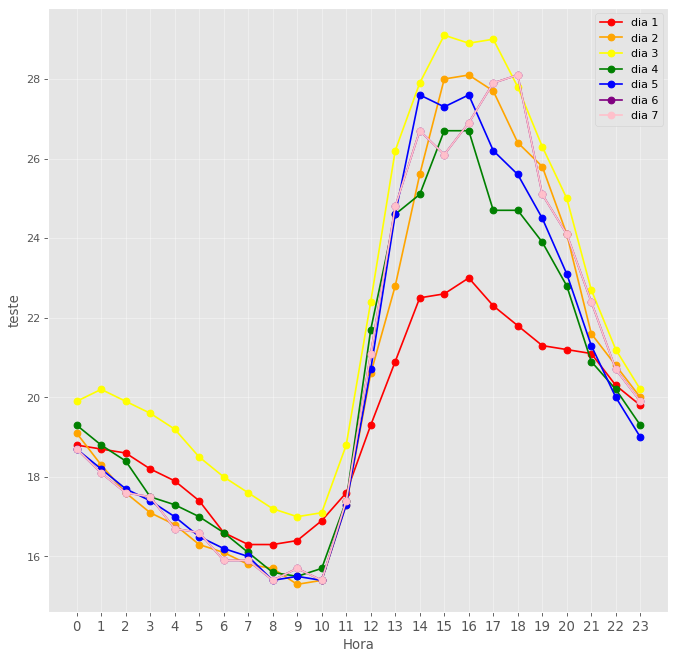

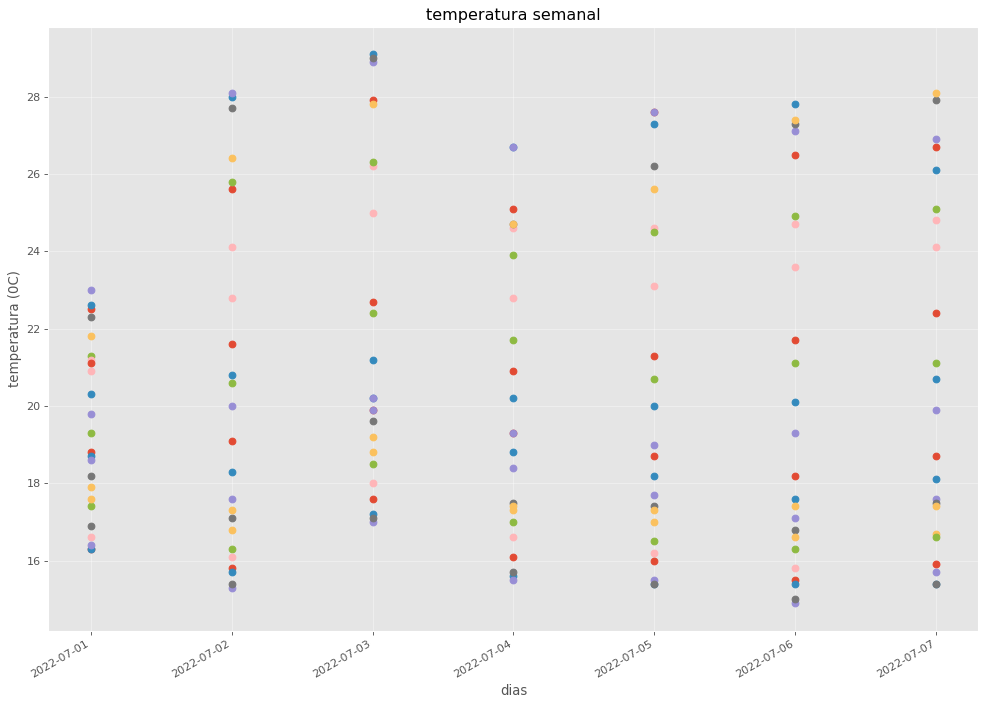

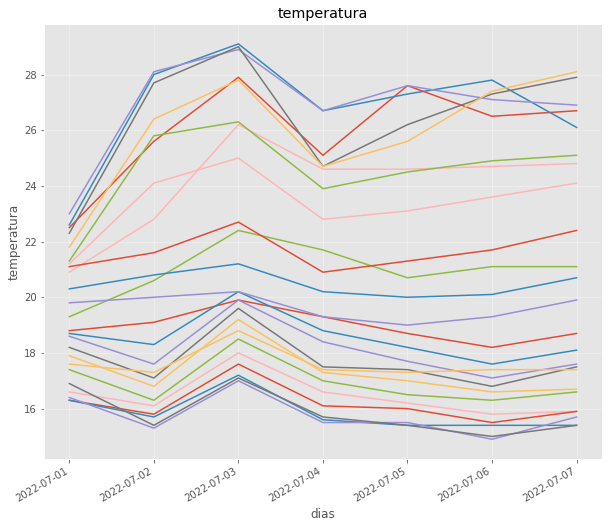

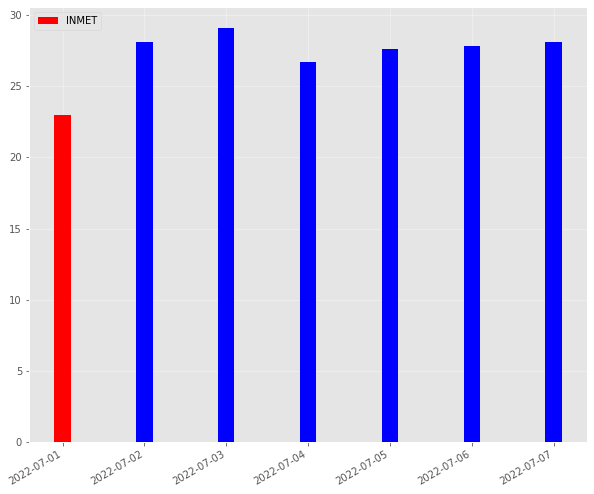

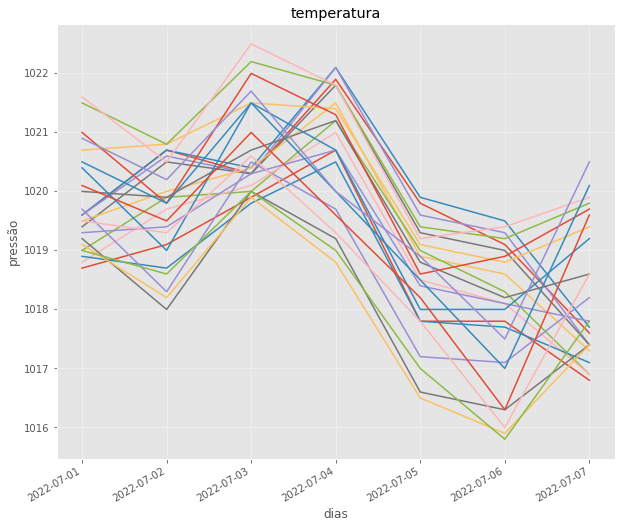

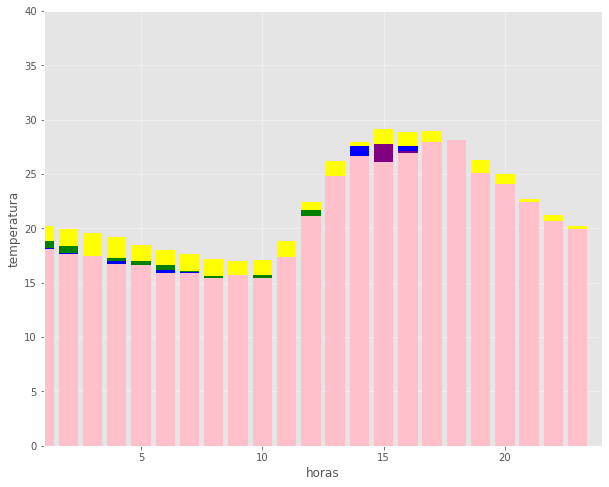

In [19]:
#criacao de um df semanal
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

import datetime
import matplotlib.dates as mdates

 

#a partir do dia 26/06 ate 02/07

df1   = pd.read_csv("C:/Users/leanderson/Documents/DataTable/20220701-inmet-angra.csv", encoding="UTF-8", sep = ";")
df2   = pd.read_csv("C:/Users/leanderson/Documents/DataTable/20220702-inmet-angra.csv", encoding="UTF-8", sep = ";")
df3   = pd.read_csv("C:/Users/leanderson/Documents/DataTable/20220703-inmet-angra.csv", encoding="UTF-8", sep = ";")
df4   = pd.read_csv("C:/Users/leanderson/Documents/DataTable/20220704-inmet-angra.csv", encoding="UTF-8", sep = ";")
df5   = pd.read_csv("C:/Users/leanderson/Documents/DataTable/20220705-inmet-angra.csv", encoding="UTF-8", sep = ";")
df6   = pd.read_csv("C:/Users/leanderson/Documents/DataTable/20220706-inmet-angra.csv", encoding="UTF-8", sep = ";")
df7   = pd.read_csv("C:/Users/leanderson/Documents/DataTable/20220707-inmet-angra.csv", encoding="UTF-8", sep = ";")




#dataframe-1
df1 = df1.drop(columns=["Temp. Max. (C)", "Temp. Min. (C)", "Umi. Max. (%)", "Umi. Min. (%)", "Pto Orvalho Ins. (C)",
                     "Pto Orvalho Max. (C)", "Pto Orvalho Min. (C)","Pressao Max. (hPa)","Pressao Min. (hPa)",
                      "Raj. Vento (m/s)", "Radiacao (KJ/m²)"])

df1 = df1.replace({',':'.'}, regex=True)
df1 = df1.fillna(0)

# Convertendo texto (object) para float
for col in df1.columns[2:]:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')


#dataframe-2
df2 = df2.drop(columns=["Temp. Max. (C)", "Temp. Min. (C)", "Umi. Max. (%)", "Umi. Min. (%)", "Pto Orvalho Ins. (C)",
                        "Pto Orvalho Max. (C)", "Pto Orvalho Min. (C)","Pressao Max. (hPa)","Pressao Min. (hPa)",
                        "Raj. Vento (m/s)", "Radiacao (KJ/m²)"])

df2 = df2.replace({',':'.'}, regex=True)
df2 = df2.fillna(0)

# Convertendo texto (object) para float
for col in df2.columns[2:]:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')


#dataframe-3
df3 = df3.drop(columns=["Temp. Max. (C)", "Temp. Min. (C)", "Umi. Max. (%)", "Umi. Min. (%)", "Pto Orvalho Ins. (C)",
                     "Pto Orvalho Max. (C)", "Pto Orvalho Min. (C)","Pressao Max. (hPa)","Pressao Min. (hPa)",
                      "Raj. Vento (m/s)", "Radiacao (KJ/m²)"])

df3 = df3.replace({',':'.'}, regex=True)
df3 = df3.fillna(0)

# Convertendo texto (object) para float
for col in df3.columns[2:]:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')


    
#dataframe-4
df4 = df4.drop(columns=["Temp. Max. (C)", "Temp. Min. (C)", "Umi. Max. (%)", "Umi. Min. (%)", "Pto Orvalho Ins. (C)",
                     "Pto Orvalho Max. (C)", "Pto Orvalho Min. (C)","Pressao Max. (hPa)","Pressao Min. (hPa)",
                      "Raj. Vento (m/s)", "Radiacao (KJ/m²)"])

df4 = df4.replace({',':'.'}, regex=True)
df4 = df4.fillna(0)

# Convertendo texto (object) para float
for col in df4.columns[2:]:
    df4[col] = pd.to_numeric(df4[col], errors='coerce')

#dataframe-5
df5 = df5.drop(columns=["Temp. Max. (C)", "Temp. Min. (C)", "Umi. Max. (%)", "Umi. Min. (%)", "Pto Orvalho Ins. (C)",
                     "Pto Orvalho Max. (C)", "Pto Orvalho Min. (C)","Pressao Max. (hPa)","Pressao Min. (hPa)",
                      "Raj. Vento (m/s)", "Radiacao (KJ/m²)"])

df5 = df5.replace({',':'.'}, regex=True)
df5 = df5.fillna(0)

# Convertendo texto (object) para float
for col in df5.columns[2:]:
    df5[col] = pd.to_numeric(df5[col], errors='coerce')
    

#dataframe-6
df6 = df6.drop(columns=["Temp. Max. (C)", "Temp. Min. (C)", "Umi. Max. (%)", "Umi. Min. (%)", "Pto Orvalho Ins. (C)",
                     "Pto Orvalho Max. (C)", "Pto Orvalho Min. (C)","Pressao Max. (hPa)","Pressao Min. (hPa)",
                      "Raj. Vento (m/s)", "Radiacao (KJ/m²)"])

df6 = df6.replace({',':'.'}, regex=True)
df6 = df6.fillna(0)

# Convertendo texto (object) para float
for col in df6.columns[2:]:
    df6[col] = pd.to_numeric(df6[col], errors='coerce')
    

#dataframe-7
df7 = df7.drop(columns=["Temp. Max. (C)", "Temp. Min. (C)", "Umi. Max. (%)", "Umi. Min. (%)", "Pto Orvalho Ins. (C)",
                     "Pto Orvalho Max. (C)", "Pto Orvalho Min. (C)","Pressao Max. (hPa)","Pressao Min. (hPa)",
                      "Raj. Vento (m/s)", "Radiacao (KJ/m²)"])

df7 = df7.replace({',':'.'}, regex=True)
df7 = df7.fillna(0)

# Convertendo texto (object) para float
for col in df7.columns[2:]:
    df7[col] = pd.to_numeric(df7[col], errors='coerce')
    
#displays
display(df1) #, display(df2), display(df3), display(df4), display(df5), display(df6), display(df7)

#infos
#print(df1.info()), print(df2.info()), print(df3.info()), print(df4.info()), print(df5.info()),
#print(df6.info()), print(df7.info())


#chamar as tabelas
temp1  = df1['Temp. Ins. (C)']
temp2  = df2['Temp. Ins. (C)']
temp3  = df3['Temp. Ins. (C)']
temp4  = df4['Temp. Ins. (C)']
temp5  = df5['Temp. Ins. (C)']
temp6  = df6['Temp. Ins. (C)']
temp7  = df7['Temp. Ins. (C)']


press1  = df1['Pressao Ins. (hPa)']
press2  = df2['Pressao Ins. (hPa)']
press3  = df3['Pressao Ins. (hPa)']
press4  = df4['Pressao Ins. (hPa)']
press5  = df5['Pressao Ins. (hPa)']
press6  = df6['Pressao Ins. (hPa)']
press7  = df7['Pressao Ins. (hPa)']


dia1 = datetime.datetime(2022, 7, 1)
dia2 = datetime.datetime(2022, 7, 2)
dia3 = datetime.datetime(2022, 7, 3)
dia4 = datetime.datetime(2022, 7, 4)
dia5 = datetime.datetime(2022, 7, 5)
dia6 = datetime.datetime(2022, 7, 6)
dia7 = datetime.datetime(2022, 7, 7)

data1  = df1.index.values, df1['Data']
data2  = df2.index.values, df2['Data']
data3  = df3.index.values, df3['Data']
data4  = df4.index.values, df4['Data']
data5  = df5.index.values, df5['Data']
data6  = df6.index.values, df6['Data']
data7  = df7.index.values, df7['Data']


hora1 = df1['Hora (UTC)']/100
hora2 = df2['Hora (UTC)']/100
hora3 = df3['Hora (UTC)']/100
hora4 = df4['Hora (UTC)']/100
hora5 = df5['Hora (UTC)']/100
hora6 = df6['Hora (UTC)']/100
hora7 = df7['Hora (UTC)']/100


horas = [hora1, hora2, hora3, hora4, hora5, hora6, hora7]

dias = [dia1, dia2, dia3, dia4, dia5, dia6, dia7]

datas = [data1, data2, data3, data4, data5, data6, data7]

values = [temp1, temp2, temp3, temp4, temp5, temp6, temp7]


plt.figure(figsize=(10, 10), dpi=80)
        
    
#melhor ideia    
    
df1['Temp. Ins. (C)'].plot(label = 'dia 1', color='red', marker='o' ) 
df2['Temp. Ins. (C)'].plot(label = 'dia 2', color='orange', marker='o' )
df3['Temp. Ins. (C)'].plot(label = 'dia 3', color='yellow', marker='o' )
df4['Temp. Ins. (C)'].plot(label = 'dia 4', color='green', marker='o' )
df5['Temp. Ins. (C)'].plot(label = 'dia 5', color='blue', marker='o' )
df7['Temp. Ins. (C)'].plot(label = 'dia 6', color='purple', marker='o' )
df7['Temp. Ins. (C)'].plot(label = 'dia 7', color='pink', marker='o' )

plt.xlabel('Hora', fontsize = 12)
plt.ylabel('teste', fontsize = 12)
plt.xticks(df1['Hora (UTC)']/100, fontsize = 12)

#plt.xticks(horas, fontsize = 12)

plt.grid(alpha = 0.4) # formato da grade
plt.legend()   


#    plt.xticks(hora, fontsize = 12)
#    data = df_previsao.at[0,'Hora (UTC)']
#    data = df_previsao['Data']
#tentativa 1

 
#for semana  in dias:
    
#for semana in datas.index[0:]:
#    print(semana)
    #df_previsao = df_previsao.drop([linha], axis = 0)
    
    
#tentativa 2    

#for week in datas:
#    print (week)


#teste '1'
plt.figure(figsize=(15, 10),dpi=80) 

plt.plot_date(dias, values)
plt.title('temperatura semanal')
plt.xticks(rotation=30, ha='right')
plt.xlabel('dias')
plt.ylabel('temperatura (0C)')
plt.grid(alpha=0.4)
plt.show()

 
#teste dois

plt.figure(figsize=(10, 8))  
plt.plot(dias, values)
plt.grid(alpha=0.4)
 
plt.title('temperatura')
plt.xticks(rotation=30, ha='right')

plt.xlabel('dias')
plt.ylabel('temperatura')
plt.show()



#teste 3

import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

plt.figure(figsize=(10, 8))
plt.grid(alpha=0.4)
ax = plt.subplot(111)


ax.bar(dia1, temp1, width=0.2, color='r', align='center', label  = 'INMET')
ax.bar(dia2, temp2, width=0.2, color='b', align='center')
ax.bar(dia3, temp3, width=0.2, color='b', align='center')

ax.bar(dia4, temp4, width=0.2, color='b', align='center')
ax.bar(dia5, temp5, width=0.2, color='b', align='center')
ax.bar(dia6, temp6, width=0.2, color='b', align='center')
ax.bar(dia7, temp7, width=0.2, color='b', align='center')

ax.xaxis_date()

plt.xticks(rotation=30, ha='right')
plt.legend(loc='upper left')
plt.show()


#teste 4 -pressão
valor = [press1, press2, press3, press4, press5, press6, press7]
#data = [data1, data2, data3, data4, data5, data6, data7]

plt.figure(figsize=(10, 8))  
plt.plot(dias, valor)
plt.grid(alpha=0.4)
 
plt.title('temperatura')
plt.xticks(rotation=30, ha='right')

plt.xlabel('dias')
plt.ylabel('pressão')
plt.show()



#dates=['2022-07-01', '2022-07-02', '2022-07-03', '2022-07-04', 
#       '2022-07-05', '2022-07-06', '2022-07-07']

#df = pd.DataFrame({'Date':dates , 'pressão 01':press1 , 'pressão 02':press2, 'pressão 03':press3,
#                   'pressão 04':press4, 'pressão 05':press5, 'pressão 06':press6, 'pressão 07':press7})

#print(df)



#teste 5 
plt.figure(figsize=(10, 8))
plt.grid(alpha=0.4)

plt.bar(df1.index.values, df1['Temp. Ins. (C)'], color='red', label='inmet'),
plt.bar(df2.index.values, df2['Temp. Ins. (C)'], color= 'orange', label='inmet'),
plt.bar(df3.index.values, df3['Temp. Ins. (C)'], color='yellow', label='inmet'),

plt.bar(df4.index.values, df4['Temp. Ins. (C)'], color='green', label='inmet'),
plt.bar(df5.index.values, df5['Temp. Ins. (C)'], color='blue', label='inmet'),
plt.bar(df6.index.values, df6['Temp. Ins. (C)'], color='purple', label='inmet'),
plt.bar(df7.index.values, df7['Temp. Ins. (C)'], color='pink', label='inmet')


plt.ylim(0,40)
plt.xlim(1,24,1)

plt.xlabel('horas')
plt.ylabel('temperatura')

plt.show()




#plot data

#fig, ax = plt.subplots(figsize=(15,7))
#plt.figure(figsize=(10, 8))
#ax.bar(df1.index, df1['Temp. Ins. (C)'])
#ax.bar(df1['Data'].index.values, df1['Temp. Ins. (C)'].index.values, width=0.2, color='r', align='center')


#ax.set_title('teste')
#ax.set_ylabel('teste')
#ax.set_xlabel('hora')


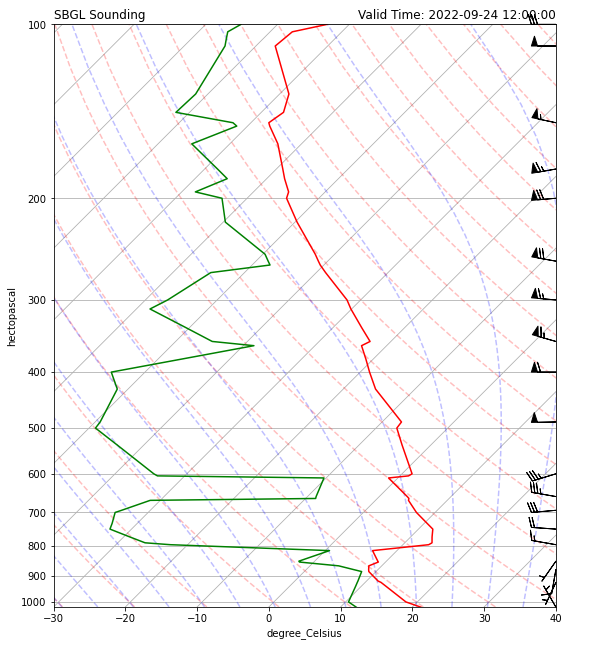

In [2]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

#padrão americano ano, mes, dia, UTC
dt = datetime(2022, 9, 24, 12)
station = 'SBGL'

#ler remotamente o sounding baseado na data e estação
df = WyomingUpperAir.request_data(  dt, station)
#print(df)
#display(df)
#print(df.info())

# Create dictionary of united arrays
data = pandas_dataframe_to_unit_arrays(df)

#isolar os arrays unidos vindos do "dicionario" para as variaveis individuais
p  = data['pressure']
T  = data['temperature']
Td = data['dewpoint']
u  = data['u_wind']
v  = data['v_wind']

# mudar o default para um melhor enquadramento (ou tamanho) no skew-T
fig = plt.figure(figsize=(9, 11))

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT(fig, rotation=45)

# Plotar a informação usando normal plotting functions, em caso de usar o
# log scaling em Y.
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0.03)

# adicionar limites para x e y.
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1020, 100)

# adicionar as plotagens para as adiabaticas 
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
#skew.plot_mixing_lines(p=np.arange(1000, 99, -20) * units.hPa,
#                       linestyle='dotted', color='tab:blue')

# Adicionar os titulos.
plt.title('{} Sounding'.format(station), loc='left')
plt.title('Valid Time: {}'.format(dt), loc='right')

plt.show()


# problema para ser resolvido: sondagem a partir de arquivos

In [5]:
#bliblioteca

import xarray as xr
import h5netcdf
import datetime
#import cartopy.crs as ccrs


#coordenadas, datas e  horarios.
latitude = -25
longitude = -70

start_year = 2022
start_month = 4
start_day = 1
start_hour = 0

fcst_year = 2022
fcst_month = 4
fcst_day = 2
fcst_hour = 17

START_DATE = datetime.datetime(start_year, start_month, start_day, start_hour) # inicialization date of the forecast
FCST_DATE = datetime.datetime(fcst_year, fcst_month, fcst_day, fcst_hour)    # date of interest (valid date)

# Calcular o praso do prognóstico

fhr = int((FCST_DATE - START_DATE).total_seconds()/3600)

var = 'T2'

# Opción 1: Para acceder al archivo online
# Option 1: To access the file online
import s3fs
s3_file = f'smn-ar-wrf/DATA/WRF/DET/{START_DATE:%Y/%m/%d/%H}/WRFDETAR_01H_{START_DATE:%Y%m%d_%H}_{fhr:03d}.nc'

fs = s3fs.S3FileSystem(anon=True)

if fs.exists(s3_file):
    f = fs.open(s3_file)
    ds = xr.open_dataset(f, decode_coords = 'all', engine = 'h5netcdf')
#else:
    print('El archivo buscado no existe')

# Opción 2: Para abrir un archivo ya descargado
# Option 2: To open an already downloaded file
#filename = 'WRFDETAR_01H_{:%Y%m%d_%H}_{:03d}.nc'.format(START_DATE,fhr)
#print(filename)
#ds = xr.open_dataset(filename, decode_coords = 'all', engine = 'h5netcd
                     
                     
# Buscamos la ubicación del punto más cercano a la latitud y longitud solicitada
# We search the closest gridpoint to the selected lat-lon 

data_crs = ccrs.LambertConformal(central_longitude = ds.CEN_LON, 
                                 central_latitude = ds.CEN_LAT, 
                                 standard_parallels = (ds.TRUELAT1, ds.TRUELAT2))
x, y = data_crs.transform_point(longitude, latitude, src_crs=ccrs.PlateCarree())

# Seleccionamos el dato mas cercano a la latitud, longitud y fecha escogida
# We extract the value at the chosen gridpoint
forecast = ds.sel(dict(x = x, y = y, time = FCST_DATE), method = 'nearest')[var]

print(f'The forecast value for the variable {var} at latitude {latitude} and longitude {longitude} is: {forecast.values:0.2f}')



ModuleNotFoundError: No module named 's3fs'

In [ ]:
#criar uma correção para a pressão atmosferica 


#criar um dataframe 
